<a href="https://colab.research.google.com/github/DmitryKutsev/hse_compling_homework/blob/master/hw5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [0]:
!pip install protobuf tqdm wheel

In [0]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Cloning into 'bigartm'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 16526 (delta 11), reused 16 (delta 5), pack-reused 16497
Receiving objects: 100% (16526/16526), 17.16 MiB | 14.49 MiB/s, done.
Resolving deltas: 100% (11554/11554), done.


In [0]:
cd bigartm

/content/bigartm


In [0]:
mkdir build

In [0]:
cd build

/content/bigartm/build


In [0]:
!cmake ..

-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Boost version: 1.65.1
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Lookin

In [0]:
!make

Scanning dependencies of target libprotobuf
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/

In [0]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.10.0-cp36-cp36m-linux_x86_64.whl


In [0]:
cd ../..

/content


In [0]:
!pip install pymorphy2[fast] nltk gensim

     |████████████████████████████████| 51kB 3.7MB/s 
     |████████████████████████████████| 7.1MB 22.0MB/s 
     |████████████████████████████████| 256kB 46.8MB/s 
  Created wheel for DAWG: filename=DAWG-0.7.8-cp36-cp36m-linux_x86_64.whl size=771484 sha256=7cb37e5d795bd26f2d1c4fde8da42ee57f09e3ddfd86f59551bbb3c7386dff08
  Stored in directory: /root/.cache/pip/wheels/d4/88/d0/4e4abc83eb8f59a71e8dbd8ba99fd5615a3af1fac1ef7f8825
Successfully built DAWG


In [0]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
import string
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [0]:
nltk.download('punkt');
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stops = set(stopwords.words('russian')) | {'gt',}
add_list = ["англ", "хабра", "хабр", "поль", "lt;div", "поэтому", "вообще",  "что-то", "джон", "кстати", "потихоньку" "крис",
            "плохо", "хорошо", "назад", "пожалуйста", "спасибо", "мк", "ми", "ос", 
            "добро", "где-нибудь", "null", "пока", "либо", "ия", "мс", "ый"] #добавил непонятные слова, и слова, 
#которые встречаются в большинстве топиков вообще, и еще аббривеатуры 
add_list = [stops.add(i) for i in add_list]

def remove_tags(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[0-9.…•"«№“’”»±€×—]+', '', text)
    # text = re.sub(r'^[A-ZА-Яa-zа-я]{1,3}\b', '', text)
    # text = re.sub(r'\b[A-ZА-Яa-zа-я]{1,3}$', '', text)  
    return re.sub(r'(^|\b)[A-ZА-Яa-zа-я]{1,3}(\b|$)', '', text) #попробую убрать на этот раз не латиницу, а все слова из 1-3 символов


def opt_normalize(texts, top=None):
    uniq = Counter()
    for text in texts:
        uniq.update(text)
    
    norm_uniq = {word:morph.parse(word.replace(':', ''))[0].normal_form for word, _ in uniq.most_common(top)}
    
    norm_texts = []
    for text in texts:
        
        norm_words = [norm_uniq.get(word) for word in text]
        norm_words = [word for word in norm_words if word and word not in stops]
        norm_texts.append(norm_words)
        
    return norm_texts

def tokenize(text):
    words = [word.strip(string.punctuation) for word in text.split()]
    words = [word for word in words if len(word)> 3] 
    
    return words

In [0]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip

--2020-02-04 19:26:42--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip [following]
--2020-02-04 19:26:42--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18645068 (18M) [application/zip]
Saving to: ‘habr_texts.txt.zip’

habr_texts.txt.zip  100%[===================>]  17.78M  --.-KB/s    in 0.09s   

2020-02-04 19:26:43 (202 MB/s) - ‘habr_texts.tx

In [0]:
!unzip habr_texts.txt.zip

Archive:  habr_texts.txt.zip
  inflating: habr_texts.txt          


In [0]:
texts = open('habr_texts.txt').read().splitlines()
texts = opt_normalize([tokenize(remove_tags(text.lower())) for text in texts], 30000)
texts[1]

['введение',
 'выбор',
 'решение',
 'рано',
 'поздно',
 'наступать',
 'момент',
 'жизнь',
 'любой',
 'сообщество',
 'форум',
 'привлечение',
 'удержание',
 'человек',
 'возникать',
 'необходимость',
 'использование',
 'новое',
 'инструментарий',
 'весьма',
 'эффективный',
 'инструмент',
 'являться',
 'крыться',
 'модный',
 'ныне',
 'слово',
 'использование',
 'характерный',
 'приём',
 'подход',
 'процесс',
 'участник',
 'сообщество',
 'форум',
 'создание',
 'активный',
 'мощный',
 'информационный',
 'вокруг',
 'наш',
 'продукт',
 'использовать',
 'наш',
 'компания',
 'движок',
 'настоящее',
 'время',
 'являться',
 'наиболее',
 'популярный',
 'быстро',
 'движок',
 'умолчание',
 'иметь',
 'встроить',
 'система',
 'трофей',
 'основать',
 'собственный',
 'весьма',
 'ограниченный',
 'система',
 'критерий',
 'система',
 'создание',
 'трофей',
 'также',
 'иметь',
 'ограниченный',
 'функционал',
 'например',
 'возможность',
 'создавать',
 'графический',
 'возможность',
 'создавать',
 'скрытый'

In [0]:

ph = gensim.models.Phrases(texts, scoring='npmi', threshold=0.3, 
                           common_terms=stops) 
p = gensim.models.phrases.Phraser(ph)
ngrammed_habr_texts = p[texts]

In [0]:
ngrammed_habr_texts[1]

['введение',
 'выбор',
 'решение',
 'рано_поздно',
 'наступать_момент',
 'жизнь',
 'любой',
 'сообщество',
 'форум',
 'привлечение',
 'удержание',
 'человек',
 'возникать_необходимость',
 'использование',
 'новое',
 'инструментарий',
 'весьма',
 'эффективный',
 'инструмент',
 'являться',
 'крыться',
 'модный',
 'ныне',
 'слово',
 'использование',
 'характерный',
 'приём',
 'подход',
 'процесс',
 'участник_сообщество',
 'форум',
 'создание',
 'активный',
 'мощный',
 'информационный',
 'вокруг',
 'наш',
 'продукт',
 'использовать',
 'наш',
 'компания',
 'движок',
 'настоящее_время',
 'являться',
 'наиболее_популярный',
 'быстро',
 'движок',
 'умолчание',
 'иметь',
 'встроить',
 'система_трофей',
 'основать',
 'собственный',
 'весьма_ограниченный',
 'система',
 'критерий',
 'система',
 'создание',
 'трофей',
 'также',
 'иметь',
 'ограниченный',
 'функционал',
 'например',
 'возможность',
 'создавать',
 'графический',
 'возможность',
 'создавать',
 'скрытый',
 'пример',
 'привести',
 'скри

In [0]:
f = open('habr_texts.vw', 'w')

for i, text in enumerate(texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()

In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()

In [0]:

batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw',  
                                        data_format='vowpal_wabbit', 
                                        target_folder='batches', 
                                       batch_size=1000) 

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches', 
                                        data_format='batches') 

In [0]:
dictionary = artm.Dictionary()

In [0]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

artm.Dictionary(name=01b72e8c-fde7-4337-b8bf-b4325b87f28f, num_entries=9824)

In [0]:
dictionary.save_text('dict.txt')
# dictionary = artm.Dictionary()
# dictionary.load_text('dict.txt')

In [0]:

model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )

In [0]:
model_artm.initialize(dictionary=dictionary, )

In [0]:


model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы

In [0]:
model_artm.num_document_passes = 2
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.001 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 1019.496 (ARTM)


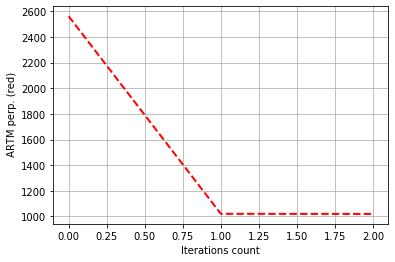

In [0]:
print_measures(model_artm)

# **Здесь я выложу лучшие темы, а дальше на всякий случай оставлю подробные результаты переобучений. На мой взгляд, модели становятся лучше с увеличением параметров, но следующая от предыдущей отличаются не разительно. А потом резко качество падает.**



**Вот три лучших темы без нграммов:**

---------
topic_11: 
диск
запись
хранение
хранилище
кластер
storage
размер
жёсткий
дисковый
носитель




topic_17: 
продукт
разработка
автоматизация
сервис
управление
интеграция
инструмент
компания
devops
софт
---------

---------
topic_20: 
резервный
виртуальный
копия
восстановление
копирование
машина
vmware
бэкап
виртуализация
backup
---------

**С нграммами получилось по-моему интереснее. Вот эти мне понравились:**


topic_20: 
виртуальный_машина
поддержка
развёртывание
среда
конфигурация
azure
виртуализация
поддерживаться
служба
windows_server

topic_12: 
сайт
рейтинг
объявление
посетитель
статья
комментарий
список
интернет-магазин
главный_страница
пример

**Не уверен, что это прям правильно, но решил выложить.**
**Это похоже на С, кажется.** 
topic_35: 
return
else
void
true
false
char
import_import
return_return
string
main


In [0]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.749 ARTM)
Sparsity Theta: 0.106 (ARTM)
Kernel contrast: 0.270 (ARTM)
Kernel purity: 0.214 (ARTM)
Perplexity: 585.489 (ARTM)


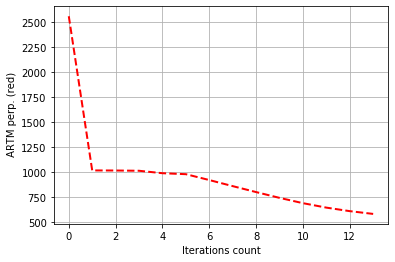

In [0]:
print_measures(model_artm)

In [0]:

for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: 
        continue

topic_0: 
поезд
твой
забавно
потихоньку
подборка
вооружение
тупо
капитан
fixed
кат
---------
topic_1: 
атака
защита
уязвимость
злоумышленник
устройство
безопасность
вредоносный
хакер
угроза
жертва
---------
topic_2: 
человек
курс
лицо
социальный
слово
чувство
говорить
дело
сказать
фотография
---------
topic_3: 
результат
решение
процесс
количество
являться
номер
задача
необходимый
связь
следующий
---------
topic_4: 
процессор
intel
накопитель
вычислительный
чип
кристалл
fpga
транзистор
компьютер
поколение
---------
topic_5: 
позволять
процесс
являться
программа
блок
использование
устройство
вид
простой
параметр
---------
topic_6: 
пользователь
ваш
использование
простой
задача
статья
любой
хотеть
необходимый
вопрос
---------
topic_7: 
заказчик
задача
заявка
нагрузка
мониторинг
ресурс
исполнитель
срок
проект
объём
---------
topic_8: 
конференция
доклад
участник
тема
выступление
рассказать
мероприятие
спикер
билет
вопрос
---------
topic_9: 
программа
точка
алгоритм
часть
некоторый
слово
я

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*1.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.5))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)


Sparsity Phi: 0.938 ARTM)
Sparsity Theta: 0.285 (ARTM)
Kernel contrast: 0.376 (ARTM)
Kernel purity: 0.513 (ARTM)
Perplexity: 472.401 (ARTM)


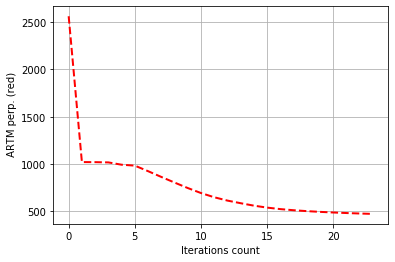

In [0]:
print_measures(model_artm)

In [0]:
# посмотрим на темы
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
        continue

topic_0: 
поезд
шутка
дверь
забавно
пора
добрый
ящик
твой
тайна
простор
---------
topic_1: 
безопасность
защита
атака
уязвимость
злоумышленник
угроза
вредоносный
хакер
жертва
взлом
---------
topic_2: 
человек
социальный
лицо
лекция
чувство
личность
счастие
курс
слово
мнение
---------
topic_3: 
результат
процесс
количество
текущий
необходимый
следующий
решение
счёт
определённый
проанализировать
---------
topic_4: 
процессор
intel
вычислительный
накопитель
аппаратный
чип
транзистор
поколение
вычисление
использование
---------
topic_5: 
позволять
являться
процесс
дополнительный
набор
вид
комбинация
способ
вариант
использование
---------
topic_6: 
любой
простой
статья
стандарт
правило
обычно
существовать
давать
именно
хотеть
---------
topic_7: 
заказчик
срок
мониторинг
заявка
нагрузка
объём
выполнение
требование
объесть
ограничение
---------
topic_8: 
участник
конференция
доклад
тема
рассказать
мероприятие
презентация
выступление
выступать
вопрос
---------
topic_9: 
глава
множество
понятие

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*3.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*2.5))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.975 ARTM)
Sparsity Theta: 0.570 (ARTM)
Kernel contrast: 0.485 (ARTM)
Kernel purity: 0.700 (ARTM)
Perplexity: 452.731 (ARTM)


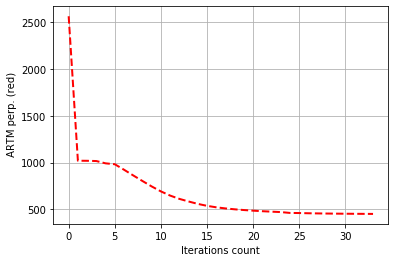

In [0]:
print_measures(model_artm)

In [0]:
# посмотрим на темы
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
        continue

topic_0: 
оставить
превращаться
обещать
кат
поезд
шутка
окончательно
добрый
очередной
наступать
---------
topic_1: 
безопасность
защита
атака
уязвимость
злоумышленник
угроза
вредоносный
информация
утечка
хакер
---------
topic_2: 
человек
социальный
лицо
чувство
внимание
лекция
личность
эмоция
друг
сильный
---------
topic_3: 
результат
текущий
счёт
формирование
процесс
определённый
окончание
необходимый
формировать
цепочка
---------
topic_4: 
процессор
intel
накопитель
вычислительный
аппаратный
чип
транзистор
использование
вычисление
поколение
---------
topic_5: 
набор
позволять
дополнительный
являться
какой-либо
непосредственно
отсутствовать
комбинация
поскольку
вид
---------
topic_6: 
любой
обычно
стандарт
простой
забывать
необходимость
удобство
угодный
существовать
люба
---------
topic_7: 
заказчик
срок
мониторинг
заявка
нагрузка
объём
выполнение
управление
ограничение
количество
---------
topic_8: 
участник
конференция
доклад
мероприятие
презентация
тема
рассказать
выступление
вопро

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*7.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*5.5))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.992 ARTM)
Sparsity Theta: 0.915 (ARTM)
Kernel contrast: 0.420 (ARTM)
Kernel purity: 0.874 (ARTM)
Perplexity: 600.417 (ARTM)


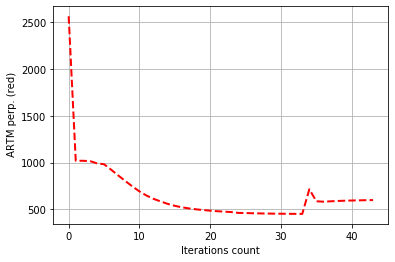

In [0]:
print_measures(model_artm)

In [0]:
# посмотрим на темы
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
        continue

topic_0: 
проект
простой
решение
пользователь
количество
процесс
результат
задача
позволять
человек
---------
topic_1: 
безопасность
защита
атака
уязвимость
компания
злоумышленник
информация
доступ
устройство
сеть
---------
topic_2: 
человек
социальный
лицо
чувство
эффект
личность
эмоция
внимание
общество
женщина
---------
topic_3: 
счёт
текущий
основной
mobile
результат
формирование
формировать
достижение
---------
topic_4: 
intel
процессор
накопитель
память
использование
чип
транзистор
вычислительный
аппаратный
ядро
---------
topic_5: 
набор
дополнительный
иметься
позволять
соответствующий
различный
поскольку
какой-либо
наличие
производиться
---------
topic_6: 
стандарт
любой
способ
однако
стандартный
обычно
правильный
очевидный
избегать
---------
topic_7: 
заказчик
срок
заявка
размещение
ресурс
управление
ограничение
приоритет
обращение
исполнитель
---------
topic_8: 
доклад
участник
конференция
выступление
рассказать
мероприятие
презентация
спикер
mailru
стенд
---------
topic_9: 
м

Дальше лучше не становилось, и я решил на этом остановиться. Попробю нграммы.

In [0]:
f = open('ng_habr_texts.vw', 'w')

for i, text in enumerate(ngrammed_habr_texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()


In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='ng_habr_texts.vw',  # название файла
                                        data_format='vowpal_wabbit', # формат файла, у нас vw
                                        target_folder='ng_batches', # название папки в которую положаться батчи
                                       batch_size=1000)

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='ng_batches', # название папки с батчами
                                        data_format='batches') 

In [0]:

# инициализируем словарь, чтобы сделать модель
ng_dictionary = artm.Dictionary()

In [0]:

ng_dictionary.gather(data_path='ng_batches')
ng_dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

artm.Dictionary(name=bb4b9b3e-88b7-4e57-8d8f-d8fcc15ad2e9, num_entries=12922)

In [0]:
ng_dictionary.save_text('ng_dict.txt')

In [0]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )

In [0]:
model_artm.initialize(dictionary=ng_dictionary, )

In [0]:

model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=ng_dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [0]:
model_artm.num_document_passes = 2
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 950.349 (ARTM)


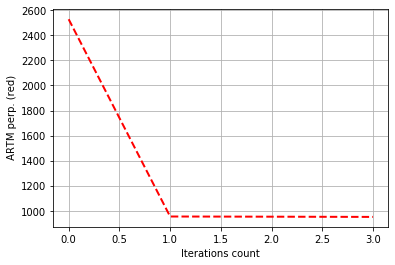

In [0]:
print_measures(model_artm)

In [0]:

model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.822 ARTM)
Sparsity Theta: 0.138 (ARTM)
Kernel contrast: 0.275 (ARTM)
Kernel purity: 0.264 (ARTM)
Perplexity: 531.903 (ARTM)


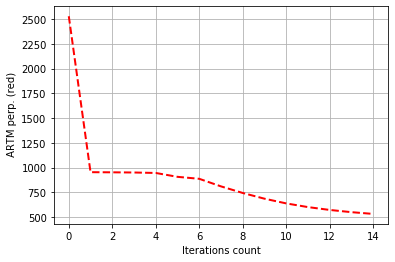

In [0]:
print_measures(model_artm)

In [0]:
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
        continue

topic_0: 
postcss
выгрузить
проблема
потихоньку
глянуть
здравый_смысл
оверхед
подвох
intellij_idea
никак_влиять
---------
topic_1: 
атака
уязвимость
год
ноутбук
защита
компьютер
безопасность
хакер
злоумышленник
жертва
---------
topic_2: 
курс
человек
лекция
лицо
ручка
распознавание
слово
фотография
чувство
сказать
---------
topic_3: 
результат
являться
процесс
решение
оценка
необходимый
проблема
количество
задача
анализ
---------
topic_4: 
intel
процессор
чип
транзистор
год
кристалл
fpga
германия
вычислительный
компьютер
---------
topic_5: 
процесс
блок
параметр
позволять
являться
вид
модуль
пример
некоторый
простой
---------
topic_6: 
модуль
необходимый
пользователь
использование
функция
любой
ваш
использоваться
создать
случай
---------
topic_7: 
заказчик
задача
нагрузка
сервер
восстановление
исполнитель
проект
требование
процесс
ресурс
---------
topic_8: 
доклад
участник
конференция
мероприятие
рассказать
тема
выступление
презентация
встреча
спикер
---------
topic_9: 
велосипед
слово

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*2.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*1.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.968 ARTM)
Sparsity Theta: 0.423 (ARTM)
Kernel contrast: 0.459 (ARTM)
Kernel purity: 0.618 (ARTM)
Perplexity: 448.091 (ARTM)


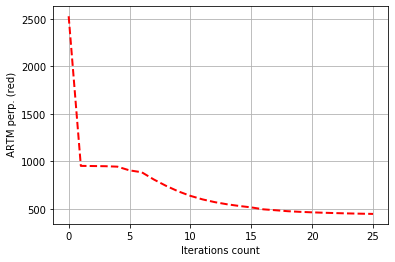

In [0]:
print_measures(model_artm)

In [0]:
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
        continue

topic_0: 
обратить
потихоньку
привычный
беспокоиться
скромный
следующий_шагом
полный_отсутствие
огромный_количество
намного_простой
начинающий
---------
topic_1: 
безопасность
атака
уязвимость
защита
злоумышленник
угроза
хакер
жертва
взлом
информационный_безопасность
---------
topic_2: 
курс
человек
лицо
лекция
речь
тренировка
знакомство
ручка
научиться
материал
---------
topic_3: 
результат
являться
практика
информационный
исходить
формирование
необходимый
вид
выдача
согласно
---------
topic_4: 
intel
чип
разработать
транзистор
вычислительный
поколение
кристалл
использование
сравнение
основа
---------
topic_5: 
параметр
дополнительный
позволять
отсутствовать
вид
внутри
процесс
являться
некоторый
набор
---------
topic_6: 
модуль
зависимость
добавить
необходимый
предоставлять
использоваться
любой
стандартный
позволять
интерфейс
---------
topic_7: 
задача
заказчик
требование
срок
выполнить
нагрузка
проект
выполнение
момент
приоритет
---------
topic_8: 
участник
доклад
конференция
меропри

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*4.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*3.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.993 ARTM)
Sparsity Theta: 0.877 (ARTM)
Kernel contrast: 0.486 (ARTM)
Kernel purity: 0.899 (ARTM)
Perplexity: 584.507 (ARTM)


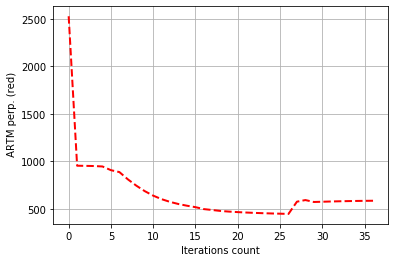

In [0]:
print_measures(model_artm)

In [0]:
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
        continue

topic_0: 
проблема
пользователь
результат
использование
задача
информация
разный
некоторый
процесс
пример
---------
topic_1: 
безопасность
атака
защита
уязвимость
злоумышленник
компания
доступ
информация
сервер
угроза
---------
topic_2: 
курс
лекция
лицо
тренировка
очки
---------
topic_3: 
необходимый
результат
являться
соответствующий
связанный
рамка
условие
практика
счёт
вид
---------
topic_4: 
intel
транзистор
чип
кристалл
fpga
поколение
процессор
вычислительный
кремний
микросхема
---------
topic_5: 
параметр
внутри
дополнительный
набор
передавать
передаваться
отсутствовать
perl
некоторый
timer
---------
topic_6: 
модуль
зависимость
модула
---------
topic_7: 
заказчик
требование
проект
задача
приоритет
выполнить
исполнитель
доработка
срок
redmine
---------
topic_8: 
участник
доклад
конференция
проект
мероприятие
рассказать
вопрос
пройти
разработчик
презентация
---------
topic_9: 
однако
требоваться
следовать
хотя
множество
представлять
называть
известный
читатель
принцип
---------
t

In [0]:
Ы